# Monte Carlo simulation MAMR1C 3T

<img src="MAMR1C 3T.PNG" ALIGN="left" width="600" height="700"> 

In [26]:
__author__ ='Sung Chung'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime
import math

pd.set_option('display.max_column',500)

### input 

biasPW_TG_R=0.44
biasPW_SG_R=1.063

T0=0
PCM_FACTOR =1.0
num_samples=10000

RT_dTdW=108*PCM_FACTOR                             #RTG dT / dW slope   
RS_dTdW=62*PCM_FACTOR                             #RSG dT / dW slope 

fname="MAMR1C_3T_" + "_" + str(V0) +"mV"
# 2.5% sigma for all resistor
RT, RT_sigma = 11.37,0.28  
RT0, RT0_sigma = 1.2, 0.03 
RLT, RLT_sigma = 0.78, 0.02   
RS, RS_sigma = 2.5, 0.0625 
RS0, RS0_sigma =1, 0.025  
RLS, RLS_sigma = 0.67, 0.017 
RL0,RL0_sigma=0.5,0.013
RM0,RM0_sigma=3.08,0.08  



def getSTOR(TG_R,SG_R,RL):
    TG_SG_resistance =  (TG_R)*(SG_R)/(TG_R+SG_R)
    STOR= (RL+TG_SG_resistance)
    return (TG_SG_resistance, STOR)

#normal distribution b 
RT_n=np.random.normal(RT,RT_sigma,num_samples)
RT0_n=np.random.normal(RT0,RT0_sigma,num_samples)
RLT_n=np.random.normal(RLT,RLT_sigma,num_samples)
RS_n=np.random.normal(RS,RS_sigma,num_samples)
RS0_n=np.random.normal(RS0,RS0_sigma,num_samples)
RLS_n=np.random.normal(RLS,RLS_sigma,num_samples)
RL0_n=np.random.normal(RL0,RL0_sigma,num_samples)
RM0_n=np.random.normal(RM0,RM0_sigma,num_samples)


df=pd.DataFrame({'RT':RT_n,'RT0':RT0_n,'RLT':RLT_n,'RS':RS_n,'RS0':RS0_n, 'RLS':RLS_n,'RL0':RL0_n,'RM0':RM0_n})

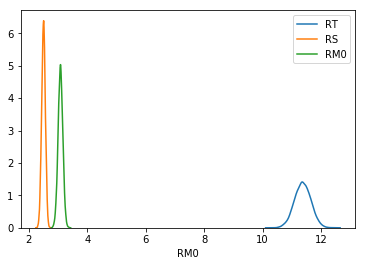

In [27]:
sns.distplot(df['RT'],hist=False,label="RT");
# sns.distplot(df['RL0'],hist=False,label="RL0");
sns.distplot(df['RS'],hist=False,label="RS");
# sns.distplot(df['RS0'],hist=False,label="RS0");
ax=sns.distplot(df['RM0'],hist=False,label="RM0");

<img src="DOE6G_2T.PNG" ALIGN="left" width="400" height="500"> 

,RT,RT0,RLT,RS,RS0,RLS,RL0,RM0,RTL,RSL,TG_R,SG_R,RL,TG_SG_R,STOR
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,11.37,1.20,0.78,2.50,1.00,0.67,0.50,3.08,1.98,1.67,13.35,4.17,3.58,3.18,6.76
std,0.28,0.03,0.02,0.06,0.03,0.02,0.01,0.08,0.04,0.03,0.28,0.07,0.08,0.04,0.09
min,10.24,1.09,0.70,2.27,0.91,0.59,0.45,2.81,1.84,1.56,12.19,3.94,3.30,3.03,6.41
25%,11.18,1.18,0.77,2.46,0.98,0.66,0.49,3.03,1.96,1.65,13.16,4.12,3.53,3.15,6.69
50%,11.37,1.20,0.78,2.50,1.00,0.67,0.50,3.08,1.98,1.67,13.35,4.17,3.58,3.18,6.76
75%,11.56,1.22,0.79,2.54,1.02,0.68,0.51,3.13,2.00,1.69,13.54,4.22,3.63,3.21,6.82
max,12.51,1.33,0.86,2.74,1.11,0.74,0.54,3.39,2.12,1.79,14.49,4.44,3.90,3.34,7.18


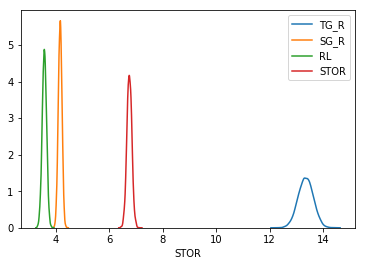

In [28]:
df['RTL']=df['RT0']+df['RLT']
df['RSL']=df['RS0']+df['RLS']

df['TG_R']=df['RT']+df['RTL']
df['SG_R']=df['RS']+df['RSL']
df['RL']=df['RL0']+df['RM0']
ans=np.vectorize(getSTOR)

df['TG_SG_R']=ans(df.TG_R,df.SG_R,df.RL)[0]
df['STOR']=ans(df.TG_R,df.SG_R,df.RL)[1]

sns.distplot(df['TG_R'],hist=False,label="TG_R");
sns.distplot(df['SG_R'],hist=False,label="SG_R");
# sns.distplot(df['TG_SG_R'],hist=False,label="TG_SG_R");
sns.distplot(df['RL'],hist=False,label="RL");
sns.distplot(df['STOR'],hist=False,label="STOR",);

df.describe().round(2)

<img src="simpleSTOR.PNG" width=500> 

In [29]:
# # Constant PW mode on TG_R & SG_R
df['iTG']=np.sqrt(biasPW_TG_R/df['TG_R']/1000)*1000
df['iSG']=np.sqrt(biasPW_SG_R/df['TG_R']/1000)*1000

df['bias_current']=df['iTG'] + df['iSG'] 

df['TG_iRatio']=df['iTG']/df['bias_current']
df['SG_iRatio']=1-df['TG_iRatio']

df['pwRTG']=(df['iTG']**2)*df['RT']/1000
df['pwRSG']=(df['iSG']**2)*df['RS']/1000

df['dT_RTG']=RT_dTdW*df['pwRTG']
df['dT_RSG']=RS_dTdW*df['pwRSG']
df['dTemp']=df['dT_RTG']+df['dT_RSG']
df['Temp']=df['dTemp']+T0

now=datetime.datetime.now()
month=now.month
day=now.day
second=now.second
df.to_csv(fname + "-{}-{}_{}sec.csv".format(month, day, second))
df.describe()

,RT,RT0,RLT,RS,RS0,RLS,RL0,RM0,RTL,RSL,TG_R,SG_R,RL,TG_SG_R,STOR,iTG,iSG,bias_current,TG_iRatio,SG_iRatio,pwRTG,pwRSG,dT_RTG,dT_RSG,dTemp,Temp
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.369251,1.200505,0.780038,2.500100,0.999712,0.670051,0.499934,3.080233,1.980543,1.669763,13.349793,4.169863,3.580167,3.176974,6.757141,5.741986,8.924881,14.666867,3.914937e-01,6.085063e-01,0.374697,0.199164,40.467232,12.348181,52.815413,52.815413
std,0.280290,0.029784,0.020099,0.062233,0.025075,0.017012,0.013041,0.080499,0.035701,0.030304,0.282645,0.069288,0.081631,0.043311,0.092267,0.060842,0.094568,0.155410,1.727023e-14,1.308918e-13,0.001697,0.006520,0.183327,0.404232,0.355682,0.355682
min,10.240704,1.093584,0.703166,2.267730,0.905660,0.594586,0.450190,2.807211,1.840329,1.559562,12.190849,3.936035,3.300158,3.026965,6.405568,5.509719,8.563863,14.073582,3.914937e-01,6.085063e-01,0.368530,0.176403,39.801205,10.936964,51.495989,51.495989
25%,11.178946,1.180296,0.766659,2.458343,0.982525,0.658599,0.491173,3.025980,1.956777,1.649531,13.158533,4.122550,3.525626,3.147354,6.694909,5.700482,8.860370,14.560852,3.914937e-01,6.085063e-01,0.373574,0.194774,40.345991,12.076004,52.577187,52.577187
50%,11.367626,1.200212,0.780358,2.500876,0.999445,0.670197,0.499878,3.080465,1.980432,1.669786,13.349966,4.170731,3.579562,3.176713,6.756931,5.740983,8.923322,14.664305,3.914937e-01,6.085063e-01,0.374712,0.199083,40.468939,12.343165,52.810157,52.810157
75%,11.559178,1.220539,0.793829,2.541400,1.016952,0.681609,0.508826,3.134484,2.004715,1.689989,13.540340,4.217104,3.634690,3.206485,6.819999,5.782593,8.987997,14.770589,3.914937e-01,6.085063e-01,0.375845,0.203430,40.591267,12.612683,53.052187,53.052187
max,12.509821,1.325668,0.861461,2.739315,1.107154,0.737141,0.543600,3.389229,2.119153,1.786284,14.494186,4.440357,3.898869,3.344689,7.181776,6.007716,9.337909,15.345625,3.914937e-01,6.085063e-01,0.380793,0.226080,41.125665,14.016962,54.190463,54.190463


In [30]:
df.describe()

,RT,RT0,RLT,RS,RS0,RLS,RL0,RM0,RTL,RSL,TG_R,SG_R,RL,TG_SG_R,STOR,iTG,iSG,bias_current,TG_iRatio,SG_iRatio,pwRTG,pwRSG,dT_RTG,dT_RSG,dTemp,Temp
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.369251,1.200505,0.780038,2.500100,0.999712,0.670051,0.499934,3.080233,1.980543,1.669763,13.349793,4.169863,3.580167,3.176974,6.757141,5.741986,8.924881,14.666867,3.914937e-01,6.085063e-01,0.374697,0.199164,40.467232,12.348181,52.815413,52.815413
std,0.280290,0.029784,0.020099,0.062233,0.025075,0.017012,0.013041,0.080499,0.035701,0.030304,0.282645,0.069288,0.081631,0.043311,0.092267,0.060842,0.094568,0.155410,1.727023e-14,1.308918e-13,0.001697,0.006520,0.183327,0.404232,0.355682,0.355682
min,10.240704,1.093584,0.703166,2.267730,0.905660,0.594586,0.450190,2.807211,1.840329,1.559562,12.190849,3.936035,3.300158,3.026965,6.405568,5.509719,8.563863,14.073582,3.914937e-01,6.085063e-01,0.368530,0.176403,39.801205,10.936964,51.495989,51.495989
25%,11.178946,1.180296,0.766659,2.458343,0.982525,0.658599,0.491173,3.025980,1.956777,1.649531,13.158533,4.122550,3.525626,3.147354,6.694909,5.700482,8.860370,14.560852,3.914937e-01,6.085063e-01,0.373574,0.194774,40.345991,12.076004,52.577187,52.577187
50%,11.367626,1.200212,0.780358,2.500876,0.999445,0.670197,0.499878,3.080465,1.980432,1.669786,13.349966,4.170731,3.579562,3.176713,6.756931,5.740983,8.923322,14.664305,3.914937e-01,6.085063e-01,0.374712,0.199083,40.468939,12.343165,52.810157,52.810157
75%,11.559178,1.220539,0.793829,2.541400,1.016952,0.681609,0.508826,3.134484,2.004715,1.689989,13.540340,4.217104,3.634690,3.206485,6.819999,5.782593,8.987997,14.770589,3.914937e-01,6.085063e-01,0.375845,0.203430,40.591267,12.612683,53.052187,53.052187
max,12.509821,1.325668,0.861461,2.739315,1.107154,0.737141,0.543600,3.389229,2.119153,1.786284,14.494186,4.440357,3.898869,3.344689,7.181776,6.007716,9.337909,15.345625,3.914937e-01,6.085063e-01,0.380793,0.226080,41.125665,14.016962,54.190463,54.190463


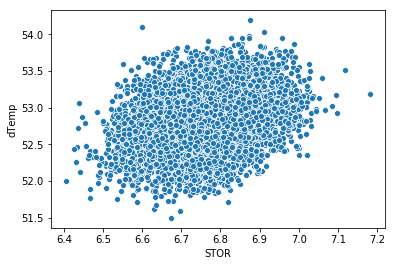

In [31]:
sns.scatterplot(x=df.STOR,y=df.dTemp)

,STOR,dT_RTG,dT_RSG,dTemp
count,10000.00,10000.00,10000.00,10000.00
mean,6.76,40.47,12.35,52.82
std,0.09,0.18,0.40,0.36
min,6.41,39.80,10.94,51.50
25%,6.69,40.35,12.08,52.58
50%,6.76,40.47,12.34,52.81
75%,6.82,40.59,12.61,53.05
max,7.18,41.13,14.02,54.19


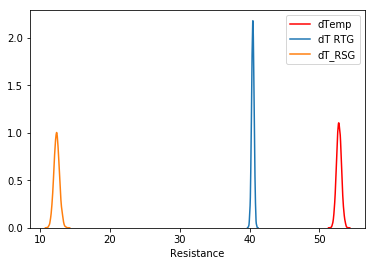

In [32]:
sns.distplot(df['dTemp'],hist=False,label='dTemp',color='r');
sns.distplot(df['dT_RTG'],hist=False,label="dT RTG");
sns.distplot(df['dT_RSG'],hist=False,label="dT_RSG");
plt.xlabel("Resistance")


df.describe().to_csv('RTG 20%, RSG: 10%, all lead 5%')
df[['STOR','dT_RTG','dT_RSG','dTemp']].describe().round(2)

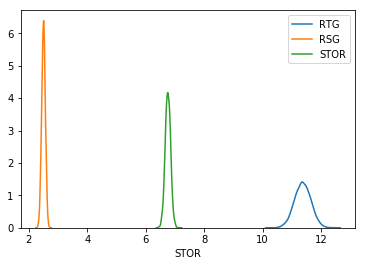

In [33]:


sns.distplot(df['RT'],hist=False,label="RTG");
sns.distplot(df['RS'],hist=False,label="RSG");
sns.distplot(df['STOR'],hist=False,label="STOR",);
# plt.xlim(left=4.7, right=6.5)
